# MEF BDA - Marketing Analytics / Assigment 2
## US Adult Income Prediction
##### Esra Arı
#####  May 6, 2018

# Introduction

The adult dataset is from the 1994 Census database. It is also known as “Census Income” dataset. Details of this dataset can be found at UCI Machine Learning Repository. Following steps will be done respectively.


You can find all the information below link.

https://archive.ics.uci.edu/ml/datasets/adult

1- Handle missing data

2- Fit a logistic regression

3- Calculate lift and 10 Decile for logistic model

4- Random Forest

5- SVM

6- Fit a simple Xgboost model with a cross validation and use Cross validation params  (not need parameter tuning)

7- Show variable importance for Xgboost model

A case study for this dataset

https://rpubs.com/H_Zhu/235617


# 1-Exploratory Data Analysis, Data Cleaning, Missing treatment

In [1]:
chooseCRANmirror(graphics=FALSE, ind=1)
knitr::opts_chunk$set(echo = TRUE)
install.packages("ggplot2")
install.packages("lattice")
install.packages("vcd")
install.packages("ROCR")
install.packages("xgboost")
install.packages("mlr")
install.packages("plyr")
install.packages("data.table")



# call in R packages for use in this study
library(ggplot2)
library(lattice)  # multivariate data visualization
library(vcd)  # data visualization for categorical variables
library(ROCR)  # evaluation of binary classifiers
library(xgboost)
library(data.table)
require(mlr)
library(ggplot2)
library(plyr)
library(stats)
library(data.table)




Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependency 'data.table'



package 'data.table' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'mlr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'plyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'plyr'"


The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpkfYd9D\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.4.4"

ERROR: Error: package or namespace load failed for 'ggplot2' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'plyr'


In [2]:
adult <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                    sep = ',', fill = F, strip.white = T)

In [3]:
colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income')

summary(adult)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                 marital_status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

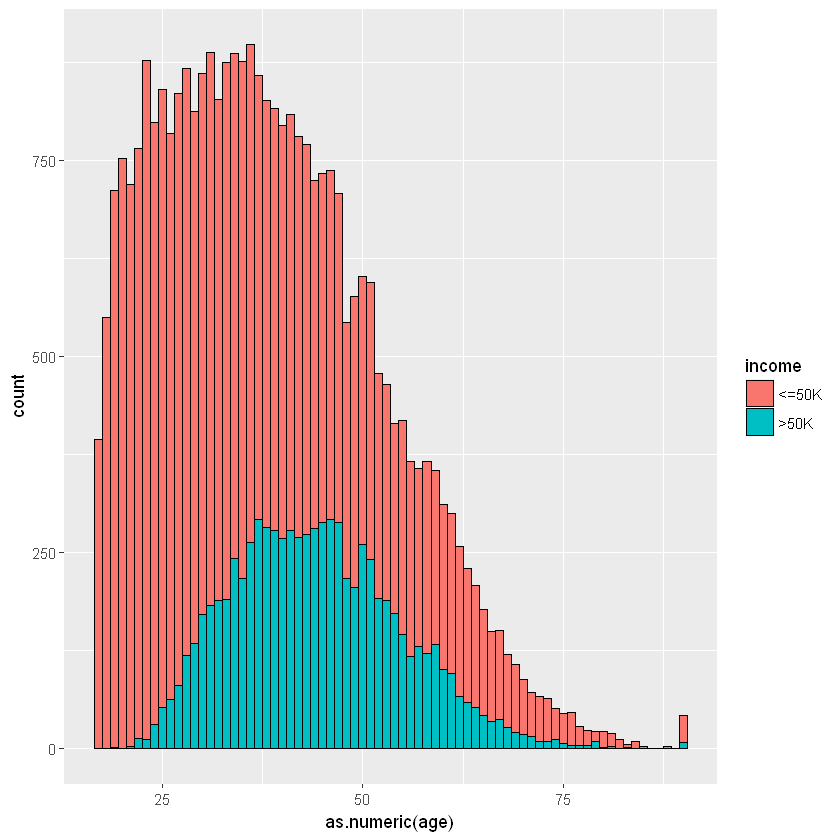

In [147]:
# histogram of age by income group
ggplot(adult) + aes(x=as.numeric(age), group=income, fill=income) + 
  geom_histogram(binwidth=1, color='black')

In [4]:
adult$fnlwgt <- NULL

The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. It is excluded from dataset because it is no self-explanatory.

In [149]:
summary(adult$workclass)

?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14

In [5]:
levels(adult$workclass)[1] <- 'Unknown'

# combine into Government job
adult$workclass <- gsub('^Federal-gov', 'Government', adult$workclass)
adult$workclass <- gsub('^Local-gov', 'Government', adult$workclass)
adult$workclass <- gsub('^State-gov', 'Government', adult$workclass) 

# combine into Self-Employed job
adult$workclass <- gsub('^Self-emp-inc', 'Self-Employed', adult$workclass)
adult$workclass <- gsub('^Self-emp-not-inc', 'Self-Employed', adult$workclass)

# combine into Other/Unknown
adult$workclass <- gsub('^Never-worked', 'Other', adult$workclass)
adult$workclass <- gsub('^Without-pay', 'Other', adult$workclass)
adult$workclass <- gsub('^Other', 'Other/Unknown', adult$workclass)
adult$workclass <- gsub('^Unknown', 'Other/Unknown', adult$workclass)

adult$workclass <- as.factor(adult$workclass)
summary(adult$workclass)

Government Other/Unknown       Private Self-Employed 
         4351          1857         22696          3657

In [151]:
summary(adult$occupation)

?      Adm-clerical      Armed-Forces      Craft-repair 
             1843              3770                 9              4099 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             4066               994              1370              2002 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             3295               149              4140               649 
            Sales      Tech-support  Transport-moving 
             3650               928              1597

In [6]:
levels(adult$occupation)[1] <- 'Unknown'
adult$occupation <- gsub('Adm-clerical', 'White-Collar', adult$occupation)
adult$occupation <- gsub('Craft-repair', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Exec-managerial', 'White-Collar', adult$occupation)
adult$occupation <- gsub('Farming-fishing', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Handlers-cleaners', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Machine-op-inspct', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Other-service', 'Service', adult$occupation)
adult$occupation <- gsub('Priv-house-serv', 'Service', adult$occupation)
adult$occupation <- gsub('Prof-specialty', 'Professional', adult$occupation)
adult$occupation <- gsub('Protective-serv', 'Service', adult$occupation)
adult$occupation <- gsub('Tech-support', 'Service', adult$occupation)
adult$occupation <- gsub('Transport-moving', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Unknown', 'Other/Unknown', adult$occupation)
adult$occupation <- gsub('Armed-Forces', 'Other/Unknown', adult$occupation)
adult$occupation <- as.factor(adult$occupation)
summary(adult$occupation)

Blue-Collar Other/Unknown  Professional         Sales       Service 
        10062          1852          4140          3650          5021 
 White-Collar 
         7836

In [153]:
summary(adult$marital_status)

Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993

In [7]:
adult$marital_status <- gsub('Married-AF-spouse', 'Married', adult$marital_status)
adult$marital_status <- gsub('Married-civ-spouse', 'Married', adult$marital_status)
adult$marital_status <- gsub('Married-spouse-absent', 'Married', adult$marital_status)
adult$marital_status <- gsub('Never-married', 'Single', adult$marital_status)
adult$marital_status <- as.factor(adult$marital_status)
summary(adult$marital_status)

Divorced   Married Separated    Single   Widowed 
     4443     15417      1025     10683       993

In [8]:
# percentage of observatiosn with no capital gain or loss
sum(adult$capital_gain == 0)/length(adult$capital_gain)

[1] 0.9167102

In [9]:
sum(adult$capital_loss == 0)/length(adult$capital_loss)

[1] 0.9533491

In fact, most observations have zero capital_gain and/or capital_loss. Similarly, there native_country displays high skewness as most observations are from United States. Therefore, these three variables are excluded from the analysis as well.

In [10]:
adult$capital_gain <- NULL
adult$capital_loss <- NULL
adult$native_country <- NULL
adult$education  <- NULL
adult$relationship <- NULL


In [11]:
summary(adult)

      age                workclass     education_num     marital_status 
 Min.   :17.00   Government   : 4351   Min.   : 1.00   Divorced : 4443  
 1st Qu.:28.00   Other/Unknown: 1857   1st Qu.: 9.00   Married  :15417  
 Median :37.00   Private      :22696   Median :10.00   Separated: 1025  
 Mean   :38.58   Self-Employed: 3657   Mean   :10.08   Single   :10683  
 3rd Qu.:48.00                         3rd Qu.:12.00   Widowed  :  993  
 Max.   :90.00                         Max.   :16.00                    
         occupation                    race           sex       
 Blue-Collar  :10062   Amer-Indian-Eskimo:  311   Female:10771  
 Other/Unknown: 1852   Asian-Pac-Islander: 1039   Male  :21790  
 Professional : 4140   Black             : 3124                 
 Sales        : 3650   Other             :  271                 
 Service      : 5021   White             :27816                 
 White-Collar : 7836                                            
 hours_per_week    income     
 Mi

In [12]:
str(adult)

'data.frame':	32561 obs. of  9 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 4 levels "Government","Other/Unknown",..: 1 4 3 3 3 3 3 4 3 3 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 5 levels "Divorced","Married",..: 4 2 1 2 2 2 2 2 4 2 ...
 $ occupation    : Factor w/ 6 levels "Blue-Collar",..: 6 6 1 1 3 6 5 6 3 6 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ income        : Factor w/ 2 levels "<=50K",">50K": 1 1 1 1 1 1 1 2 2 2 ...


# 2-Fit a logistic regression

80% of the original data is used as the training set, while the rest 20% is used as test set.

In [159]:
splitdf <- function(dataframe, seed=1234) {
  if (!is.null(seed)) set.seed(seed)
  index <- 1:nrow(dataframe)
  trainindex <- sample(index, trunc(round(length(index)*0.8)))
  trainset <- dataframe[trainindex, ]
  testset <- dataframe[-trainindex, ]
  list(trainset=trainset,testset=testset)
}
    
tr <-splitdf(adult)
training_set <- data.frame(tr$trainset)
testing_set <- data.frame(tr$testset)


A logistic regression using income as the response variable, and all other 8 variables as predictors is fitted. Its parameter estimates and confidence intervals are reported as below.

In [160]:
m1 <- glm(income ~ ., data = training_set, family = binomial('logit'))
print(summary(m1))


Call:
glm(formula = income ~ ., family = binomial("logit"), data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7450  -0.5810  -0.2514  -0.0642   3.3234  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -9.580585   0.281525 -34.031  < 2e-16 ***
age                      0.029931   0.001653  18.105  < 2e-16 ***
workclassOther/Unknown  -1.497645   0.772113  -1.940 0.052420 .  
workclassPrivate         0.053867   0.053367   1.009 0.312791    
workclassSelf-Employed  -0.190033   0.069290  -2.743 0.006096 ** 
education_num            0.319979   0.009415  33.986  < 2e-16 ***
marital_statusMarried    1.954146   0.065965  29.624  < 2e-16 ***
marital_statusSeparated -0.218152   0.161028  -1.355 0.175500    
marital_statusSingle    -0.600133   0.082464  -7.277 3.40e-13 ***
marital_statusWidowed   -0.114768   0.150922  -0.760 0.446985    
occupationOther/Unknown  1.164045   0.772132   1.508 0.131664  

In [161]:
print(anova(m1, test="Chisq"))

Analysis of Deviance Table

Model: binomial, link: logit

Response: income

Terms added sequentially (first to last)


               Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                           26048      28873              
age             1   1440.8     26047      27433 < 2.2e-16 ***
workclass       3    445.7     26044      26987 < 2.2e-16 ***
education_num   1   3033.5     26043      23953 < 2.2e-16 ***
marital_status  4   4164.6     26039      19789 < 2.2e-16 ***
occupation      5    226.9     26034      19562 < 2.2e-16 ***
race            4     51.7     26030      19510 1.625e-10 ***
sex             1    127.8     26029      19382 < 2.2e-16 ***
hours_per_week  1    387.6     26028      18995 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [169]:
training_set$Predict_Prob_Response <- predict.glm(m1, type = "response") 
testing_set$Predict_Prob_Response <- predict(m1, testing_set, type = 'response')

In [170]:
summary(training_set)
summary(testing_set)

      age                workclass     education_num     marital_status 
 Min.   :17.00   Government   : 3533   Min.   : 1.00   Divorced : 3556  
 1st Qu.:28.00   Other/Unknown: 1458   1st Qu.: 9.00   Married  :12282  
 Median :37.00   Private      :18182   Median :10.00   Separated:  820  
 Mean   :38.59   Self-Employed: 2876   Mean   :10.08   Single   : 8590  
 3rd Qu.:48.00                         3rd Qu.:12.00   Widowed  :  801  
 Max.   :90.00                         Max.   :16.00                    
         occupation                   race           sex        hours_per_week 
 Blue-Collar  :8040   Amer-Indian-Eskimo:  254   Female: 8640   Min.   : 1.00  
 Other/Unknown:1454   Asian-Pac-Islander:  840   Male  :17409   1st Qu.:40.00  
 Professional :3368   Black             : 2478                  Median :40.00  
 Sales        :2896   Other             :  230                  Mean   :40.42  
 Service      :3980   White             :22247                  3rd Qu.:45.00  
 White-Co

      age                workclass    education_num     marital_status
 Min.   :17.00   Government   : 818   Min.   : 1.00   Divorced : 887  
 1st Qu.:28.00   Other/Unknown: 399   1st Qu.: 9.00   Married  :3135  
 Median :37.00   Private      :4514   Median :10.00   Separated: 205  
 Mean   :38.55   Self-Employed: 781   Mean   :10.07   Single   :2093  
 3rd Qu.:47.00                        3rd Qu.:12.00   Widowed  : 192  
 Max.   :90.00                        Max.   :16.00                   
         occupation                   race          sex       hours_per_week 
 Blue-Collar  :2022   Amer-Indian-Eskimo:  57   Female:2131   Min.   : 1.00  
 Other/Unknown: 398   Asian-Pac-Islander: 199   Male  :4381   1st Qu.:40.00  
 Professional : 772   Black             : 646                 Median :40.00  
 Sales        : 754   Other             :  41                 Mean   :40.49  
 Service      :1041   White             :5569                 3rd Qu.:45.00  
 White-Collar :1525                

In [172]:
# predicted response to offer using using 0.5 cut-off
# notice that this does not work due to low base rate
# we get more than 90 percent correct with no model 
# (predicting all NO responses)
# the 0.50 cutoff yields all NO predictions 
training_set$Predict_Response <- 
    ifelse((training_set$Predict_Prob_Response > 0.5), 2, 1)
training_set$Predict_Response <- factor(training_set$Predict_Response,
    levels = c(1, 2), labels = c("NO", "YES"))  
confusion_matrix <- table(training_set$Predict_Response, training_set$income)
cat("\nConfusion Matrix (rows=Predicted Response, columns=Actual Choice\n")
print(confusion_matrix)
predictive_accuracy <- (confusion_matrix[1,1] + confusion_matrix[2,2])/
                        sum(confusion_matrix)                                              
cat("\nPercent Accuracy: ", round(predictive_accuracy * 100, digits = 1))



Confusion Matrix (rows=Predicted Response, columns=Actual Choice
     
      <=50K  >50K
  NO  18183  2976
  YES  1543  3347

Percent Accuracy:  82.7

In [173]:
testing_set$Predict_Response <- 
    ifelse((testing_set$Predict_Prob_Response > 0.5), 2, 1)
testing_set$Predict_Response <- factor(testing_set$Predict_Response,
    levels = c(1, 2), labels = c("NO", "YES"))  
confusion_matrix <- table(testing_set$Predict_Response, testing_set$income)
cat("\nConfusion Matrix (rows=Predicted Response, columns=Actual Choice\n")
print(confusion_matrix)
predictive_accuracy <- (confusion_matrix[1,1] + confusion_matrix[2,2])/
                        sum(confusion_matrix)                                              
cat("\nPercent Accuracy: ", round(predictive_accuracy * 100, digits = 1))


Confusion Matrix (rows=Predicted Response, columns=Actual Choice
     
      <=50K >50K
  NO   4556  732
  YES   438  786

Percent Accuracy:  82

# 3- Calculate lift and 10 Decile for logistic model

In [175]:
# --------------------------------------------------------
# direct calculation of lift (code revised from textbook)
baseline_response_rate <- 
    as.numeric(table(training_set$income)[2])/nrow(training_set)
    
lift <- function(x, baseline_response_rate) {
    mean(x) / baseline_response_rate
    }
    
decile_break_points <- c(as.numeric(quantile(training_set$Predict_Prob_Response,
    probs=seq(0, 1, 0.10))))   
    
training_set$decile <- cut(training_set$Predict_Prob_Response,      
    breaks = decile_break_points,
    include.lowest=TRUE,
    labels=c("Decile_10","Decile_9","Decile_8","Decile_7","Decile_6",
    "Decile_5","Decile_4","Decile_3","Decile_2","Decile_1"))    

# define response as 0/1 binary 
training_set$response_binary <- as.numeric(training_set$income) - 1

cat("\nLift Chart Values by Decile:\n")    
print(by(training_set$response_binary, training_set$decile, 
    function(x) lift(x, baseline_response_rate)))    




Lift Chart Values by Decile:
training_set$decile: Decile_10
[1] 0.01107027
------------------------------------------------------------ 
training_set$decile: Decile_9
[1] 0.03953668
------------------------------------------------------------ 
training_set$decile: Decile_8
[1] 0.1027954
------------------------------------------------------------ 
training_set$decile: Decile_7
[1] 0.1817989
------------------------------------------------------------ 
training_set$decile: Decile_6
[1] 0.3733696
------------------------------------------------------------ 
training_set$decile: Decile_5
[1] 0.745157
------------------------------------------------------------ 
training_set$decile: Decile_4
[1] 1.269918
------------------------------------------------------------ 
training_set$decile: Decile_3
[1] 1.731706
------------------------------------------------------------ 
training_set$decile: Decile_2
[1] 2.331082
------------------------------------------------------------ 
training_set$deci

In [176]:
# --------------------------------------------------------
# direct calculation of lift (code revised from textbook)
baseline_response_rate <- 
    as.numeric(table(testing_set$income)[2])/nrow(testing_set)
    
lift <- function(x, baseline_response_rate) {
    mean(x) / baseline_response_rate
    }
    
decile_break_points <- c(as.numeric(quantile(testing_set$Predict_Prob_Response,
    probs=seq(0, 1, 0.10))))   
    
testing_set$decile <- cut(testing_set$Predict_Prob_Response,      
    breaks = decile_break_points,
    include.lowest=TRUE,
    labels=c("Decile_10","Decile_9","Decile_8","Decile_7","Decile_6",
    "Decile_5","Decile_4","Decile_3","Decile_2","Decile_1"))    

# define response as 0/1 binary 
testing_set$response_binary <- as.numeric(testing_set$income) - 1

cat("\nLift Chart Values by Decile:\n")    
print(by(testing_set$response_binary, testing_set$decile, 
    function(x) lift(x, baseline_response_rate)))    


Lift Chart Values by Decile:
testing_set$decile: Decile_10
[1] 0.02623765
------------------------------------------------------------ 
testing_set$decile: Decile_9
[1] 0.0859293
------------------------------------------------------------ 
testing_set$decile: Decile_8
[1] 0.05271711
------------------------------------------------------------ 
testing_set$decile: Decile_7
[1] 0.237227
------------------------------------------------------------ 
testing_set$decile: Decile_6
[1] 0.329482
------------------------------------------------------------ 
testing_set$decile: Decile_5
[1] 0.8434738
------------------------------------------------------------ 
testing_set$decile: Decile_4
[1] 1.311338
------------------------------------------------------------ 
testing_set$decile: Decile_3
[1] 1.736997
------------------------------------------------------------ 
testing_set$decile: Decile_2
[1] 2.237324
------------------------------------------------------------ 
testing_set$decile: Decile_

# 4- Random Forest

In [177]:
install.packages("randomForest")
library(randomForest)

Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpgBVM2t\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [178]:
rf3 <- randomForest(income ~ ., data = training_set, ntree = 1000)
rf3.pred.prob <- predict(rf3, newdata = testing_set, type = 'prob')
rf3.pred <- predict(rf3, newdata = testing_set, type = 'class')
# confusion matrix 
tb3 <- table(rf3.pred, testing_set$income)
tb3

        
rf3.pred <=50K >50K
   <=50K  4994    0
   >50K      0 1518

# 5- SVM

In [180]:
install.packages("kernlab")
library(kernlab)

Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpgBVM2t\downloaded_packages


Warning message:
"package 'kernlab' was built under R version 3.4.4"
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [181]:
svm4 <- ksvm(income ~ ., data = training_set)
svm4.pred.prob <- predict(svm4, newdata = testing_set, type = 'decision')
svm4.pred <- predict(svm4, newdata = testing_set, type = 'response')
# confusion matrix 
tb4 <- table(svm4.pred, testing_set$income)
tb4

         
svm4.pred <=50K >50K
    <=50K  4994    0
    >50K      0 1518

# 6- Fit a simple Xgboost model with a cross validation and use Cross validation params  (not need parameter tuning)

In [142]:
.libPaths('~/R/win-library/3.4')

In [143]:
install.packages("data.table", dependencies=TRUE)
library(data.table)

Installing package into 'C:/Users/aries/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"


The downloaded binary packages are in
	C:\Users\aries\AppData\Local\Temp\RtmpgBVM2t\downloaded_packages


ERROR: Error in library(data.table): there is no package called 'data.table'


In [ ]:
setDT(training_set) 
setDT(testing_set)

In [ ]:
#using one hot encoding

labels <- training_set$income 
ts_label <- testing_set$income

In [ ]:
# datada görülen katogorik degiskenler, one hot encoding

new_tr <- model.matrix(~.+0,data = training_set[,-c("income"),with=F]) 
new_ts <- model.matrix(~.+0,data = testing_set[,-c("income"),with=F])

In [ ]:
#convert factor to numeric 

labels <- as.numeric(as.factor(labels))-1
ts_label <- as.numeric(as.factor(ts_label))-1

In [ ]:
###For xgboost, we'll use xgb.DMatrix to convert data table into a matrix (most recommended):


#preparing matrix 
dtrain <- xgb.DMatrix(data = new_tr,label = labels) 
dtest <- xgb.DMatrix(data = new_ts,label=ts_label)

In [ ]:
#default parameters
params <- list(booster = "gbtree", objective = "binary:logistic", eta=0.01, gamma=0, max_depth=9, min_child_weight=1, subsample=1, colsample_bytree=1)

#Using the inbuilt xgb.cv function, let's calculate the best nround for this model. In addition, this function also returns CV error, which is an estimate of test error.
xgbcv <- xgb.cv( params = params, data = dtrain, nrounds = 300, nfold = 5, showsd = T, stratified = T, print_every_n = 10, early_stopping_rounds = 20, maximize = F)

#first default - model training
xgb1 <- xgb.train (params = params, data = dtrain, nrounds = 300, watchlist = list(val=dtest,train=dtrain), print_every_n  = 10, early_stopping_rounds= 10, maximize = F , eval_metric = "auc")


#model prediction
xgbpred <- predict (xgb1,dtest)
xgbpred <- ifelse (xgbpred > 0.5,1,0)

#confusion matrix

confusionMatrix(xgbpred, ts_label)

# 7- Show variable importance for Xgboost model

In [ ]:
#view variable importance plot
mat <- xgb.importance (feature_names = colnames(new_tr),model = xgb1)
xgb.ggplot.importance(mat,top_n = 30)